In [85]:
## import preprocessing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [86]:
## read train and test data into pandas dataframes
df_train = pd.read_csv('./sign_mnist_train/sign_mnist_train.csv')
df_test = pd.read_csv('./sign_mnist_test/sign_mnist_test.csv')

In [89]:
## view df
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [90]:
## separate labels and images
X_train = df_train.iloc[:,1:].values
y_train = df_train.iloc[:,0].values

X_test = df_test.iloc[:,1:].values
y_test = df_test.iloc[:,0].values

## reshape each sample (-1) into (28,28,1) from (784)
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

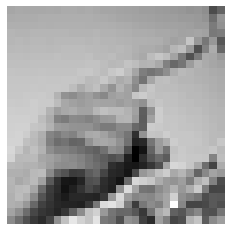

<Figure size 432x288 with 0 Axes>

In [25]:
## show and save a sample as image
imtest = X_train[1]
plt.imshow(imtest, cmap = "gray") 
fig1 = plt.gcf()
plt.axis('off')
plt.show()
plt.draw()
fig1.savefig('sample.png', bbox_inches='tight', pad_inches=0)

In [92]:
for i in range(26):
    print(sum(y_train==i))
# no letters j or z

1126
1010
1144
1196
957
1204
1090
1013
1162
0
1114
1241
1055
1151
1196
1088
1279
1294
1199
1186
1161
1082
1225
1164
1118
0


In [113]:
## import NN libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import time

In [123]:
## Create an image data generator for image augmentation (expands and varies the dataset)
train_datagen = ImageDataGenerator(
    rescale = 1 / 255,
    rotation_range = 45,
    width_shift_range = 0.20,
    height_shift_range = 0.20,
    shear_range = 0.20,
    zoom_range = 0.20,
    horizontal_flip = True,
    brightness_range = [0.5,1], # darker images
    fill_mode = 'nearest'
)

valid_datagen = ImageDataGenerator(rescale = 1 / 255)

In [124]:
## construct the NN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(26, activation = 'softmax')
])

## compile the model
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [125]:
## setup to train the model
my_batch_size = 32
my_epochs = 10

import time
start_time = time.time()
## fit the model (train)
history = model.fit(train_datagen.flow(X_train, y_train, batch_size = my_batch_size),
              steps_per_epoch = len(X_train) / my_batch_size,
              epochs = my_epochs,
              validation_data = valid_datagen.flow(X_test, y_test, batch_size = my_batch_size),
              validation_steps = len(y_test) / my_batch_size
             )

print("--- %s minutes ---" % ((time.time() - start_time) / 60))

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 857.96875 steps, validate for 224.125 steps
Epoch 1/10
858/857 [==============================] - 30s 35ms/step - loss: 2.7702 - accuracy: 0.1573 - val_loss: 1.9642 - val_accuracy: 0.3385
Epoch 2/10
858/857 [==============================] - 33s 39ms/step - loss: 2.0793 - accuracy: 0.3414 - val_loss: 1.3747 - val_accuracy: 0.5197
Epoch 3/10
858/857 [==============================] - 30s 35ms/step - loss: 1.6794 - accuracy: 0.4580 - val_loss: 1.0378 - val_accuracy: 0.6511
Epoch 4/10
858/857 [==============================] - 31s 37ms/step - loss: 1.4189 - accuracy: 0.5401 - val_loss: 1.0898 - val_accuracy: 0.6241
Epoch 5/10
858/857 [==============================] - 29s 33ms/step - loss: 1.2186 - accuracy: 0.6018 - val_loss: 0.7459 - val_accuracy: 0.7243
Epoch 6/10
858/857 [==============================] - 32s 37ms/step - loss: 1.0766 - accuracy: 0.6505 - val_loss: 0.5670 - val_accuracy: 0.7844
Epoch 7/10
858/857 [============

In [126]:
## get model accuracy over time
history.history['accuracy']

[0.15727554,
 0.34143144,
 0.4580222,
 0.54008377,
 0.60178477,
 0.6504826,
 0.6876343,
 0.7147332,
 0.7351302,
 0.75953376]

In [127]:
## evaluate the model
model.evaluate(X_test, y_test, verbose = 2)

7172/7172 - 2s - loss: 62.4777 - accuracy: 0.8311


[62.477741256347926, 0.8311489]

In [130]:
# !pip install tensorflowjs

  Using cached tensorboard-2.1.1-py3-none-any.whl (3.8 MB)
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1


Traceback (most recent call last):
  File "c:\users\samih\anaconda3\envs\tf\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "c:\users\samih\anaconda3\envs\tf\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\samih\anaconda3\envs\tf\Scripts\tensorflowjs_converter.exe\__main__.py", line 7, in <module>
  File "c:\users\samih\anaconda3\envs\tf\lib\site-packages\tensorflowjs\converters\converter.py", line 813, in pip_main
    main([' '.join(sys.argv[1:])])
  File "c:\users\samih\anaconda3\envs\tf\lib\site-packages\tensorflowjs\converters\converter.py", line 817, in main
    convert(argv[0].split(' '))
  File "c:\users\samih\anaconda3\envs\tf\lib\site-packages\tensorflowjs\converters\converter.py", line 804, in convert
    weight_shard_size_bytes, metadata_map)
  File "c:\users\samih\anaconda3\envs\tf\lib\site-packages\tensorflowjs\converters\converter.py", line 501, in _dispatch_converter
    metadata=metadata_map)
  File "c:\

In [138]:
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model, '.\content')

In [143]:
model.save('model.h5')